# **Dataset Preparation:**



In [ ]:
import tensorflow_datasets as tfds

ag_dataset = tfds.load("ag_news_subset", with_info=False, as_supervised=True)

In [ ]:
import numpy as np

train_data, test_data = ag_dataset['train'], ag_dataset["test"]

training_sentences = []
training_labels = []

testing_sentences = []
testing_labels = []

for sentence, label in train_data:
  training_sentences.append(sentence.numpy().decode('utf8'))
  training_labels.append(label.numpy())

for sentence, label in test_data:
  testing_sentences.append(sentence.numpy().decode('utf8'))
  testing_labels.append(label.numpy())

training_labels = np.array(training_labels)
testing_labels = np.array(testing_labels)

In [ ]:
labels_meanings = ["World", "Sports", "Business", "Sci/Tech"]

for example in test_data.take(2):
  review = example[0].numpy().decode('utf8')
  label = example[1].numpy()
  print("Review: ", review)
  print("Label: ", label)
  print("Label meaning: ", labels_meanings[label])

Review:   CHARLOTTE, N.C. (Sports Network) - Carolina Panthers  running back Stephen Davis will miss the remainder of the  season after being placed on injured reserve Saturday.
Label:  1
Label meaning:  Sports
Review:   PRESENTACION, Philippines (Reuters) - Philippine communist  rebels freed Wednesday two soldiers they had held as "prisoners  of war" for more than five months, saying they wanted to  rebuild confidence in peace talks with the government.
Label:  0
Label meaning:  World


# **Preprocessing:**

In [ ]:
num_words = 1000
embedding_dim = 32
max_length = 32
trunc_type = 'post'
oov_token = "<OOV>"

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=num_words, oov_token=oov_token)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

In [ ]:
training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length)

# **Plots:**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


def plot_metrics(training_history):
    train_loss = training_history.history['loss']
    train_acc = training_history.history['accuracy']
    val_loss = training_history.history['val_loss']
    val_acc = training_history.history['val_accuracy']
    epochs = range(1, len(train_loss) + 1)

    plt.figure(figsize=(10, 4))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_loss, 'b-', label='Training Loss')
    plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
    plt.plot(epochs, train_loss, 'bo', markersize=4)
    plt.plot(epochs, val_loss, 'ro', markersize=4)
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_acc, 'b-', label='Training Accuracy')
    plt.plot(epochs, val_acc, 'r-', label='Validation Accuracy')
    plt.plot(epochs, train_acc, 'bo', markersize=4)
    plt.plot(epochs, val_acc, 'ro', markersize=4)
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()


def plot_confusion_matrix(model):
    predictions = model.predict(testing_padded)
    predicted_labels = np.argmax(predictions, axis=1)
    conf_matrix = confusion_matrix(testing_labels, predicted_labels)
    conf_disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=labels_meanings)

    plt.figure(figsize=(12, 10))
    conf_disp.plot(cmap=plt.cm.Blues)
    plt.show()

# **Model - RNN:**

In [35]:
from tensorflow.keras.optimizers import Adam

model_rnn = tf.keras.Sequential([
    tf.keras.layers.Embedding(num_words, embedding_dim, input_length=max_length),
    tf.keras.layers.SimpleRNN(32, return_sequences=True, dropout=0.2, recurrent_dropout=0.2),
    tf.keras.layers.SimpleRNN(16, dropout=0.2, recurrent_dropout=0.2),
    tf.keras.layers.Dense(4, activation='softmax')
])

model_rnn.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])

In [ ]:
training_history_rnn = model_rnn.fit(training_padded, training_labels, epochs=15, validation_data=(testing_padded, testing_labels))  # Done

Epoch 1/15
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 36s 8ms/step - accuracy: 0.2565 - loss: 1.5194 - val_accuracy: 0.3139 - val_loss: 1.3566
Epoch 2/15
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 37s 8ms/step - accuracy: 0.3355 - loss: 1.3174 - val_accuracy: 0.4855 - val_loss: 0.9740
Epoch 3/15
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 39s 7ms/step - accuracy: 0.4747 - loss: 1.0115 - val_accuracy: 0.5126 - val_loss: 0.9417
Epoch 4/15
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 41s 7ms/step - accuracy: 0.5048 - loss: 0.9490 - val_accuracy: 0.5862 - val_loss: 0.8973
Epoch 5/15
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 41s 7ms/step - accuracy: 0.5921 - loss: 0.8691 - val_accuracy: 0.6786 - val_loss: 0.7795
Epoch 6/15
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 42s 8ms/step - accuracy: 0.6787 - loss: 0.7506 - val_accuracy: 0.7387 - val_loss: 0.7213
Epoch 7/15
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 39s 7ms/step - accuracy: 0.7485 - loss: 0.6614 - val_accuracy: 0.7596 - val_loss: 0.6676
Epoch 8/15
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 27s 7ms/step - accuracy: 0.7793 - loss: 0

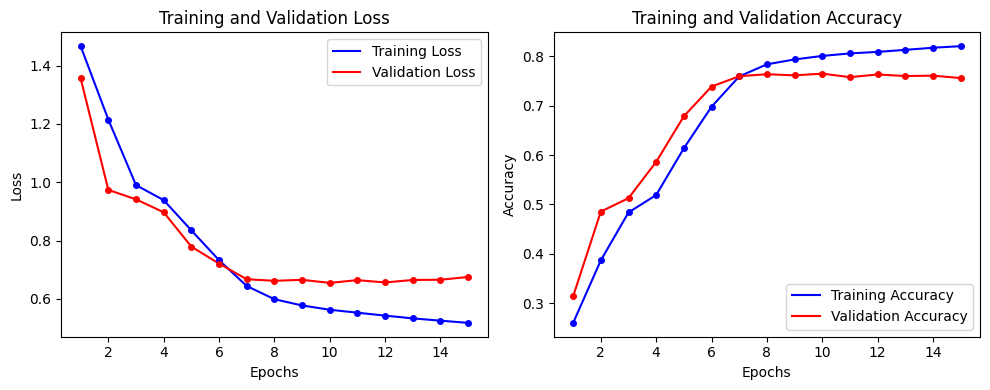

In [ ]:
plot_metrics(training_history_rnn)

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


<Figure size 1200x1000 with 0 Axes>

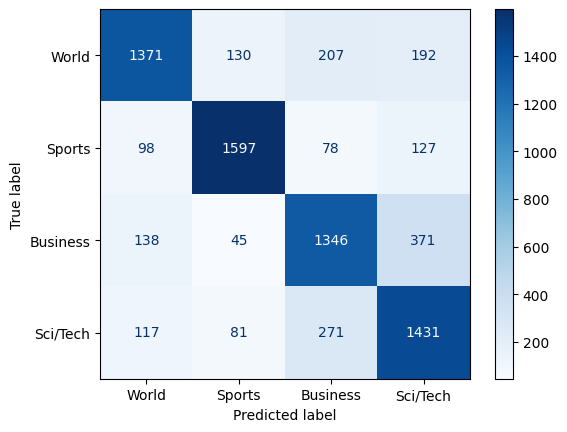

In [ ]:
plot_confusion_matrix(model_rnn)

# **Model - GRU:**

In [ ]:
model_gru = tf.keras.Sequential([
    tf.keras.layers.Embedding(num_words, embedding_dim, input_length=max_length),
    tf.keras.layers.GRU(32, return_sequences=True, dropout=0.2, recurrent_dropout=0.2),
    tf.keras.layers.GRU(16, dropout=0.2, recurrent_dropout=0.2),
    tf.keras.layers.Dense(4, activation='softmax')
])

model_gru.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.00002), metrics=['accuracy'])

In [ ]:
training_history_gru = model_gru.fit(training_padded, training_labels, epochs=20, validation_data=(testing_padded, testing_labels))  # Done

Epoch 1/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 104s 27ms/step - accuracy: 0.2970 - loss: 1.3799 - val_accuracy: 0.4795 - val_loss: 1.3155
Epoch 2/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 100s 27ms/step - accuracy: 0.5053 - loss: 1.1225 - val_accuracy: 0.6475 - val_loss: 1.1727
Epoch 3/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 140s 26ms/step - accuracy: 0.6832 - loss: 0.8580 - val_accuracy: 0.7199 - val_loss: 1.0611
Epoch 4/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 143s 27ms/step - accuracy: 0.7351 - loss: 0.7346 - val_accuracy: 0.7439 - val_loss: 0.9947
Epoch 5/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 140s 26ms/step - accuracy: 0.7618 - loss: 0.6703 - val_accuracy: 0.7464 - val_loss: 0.9525
Epoch 6/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 99s 26ms/step - accuracy: 0.7794 - loss: 0.6250 - val_accuracy: 0.7495 - val_loss: 0.9148
Epoch 7/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 140s 26ms/step - accuracy: 0.7919 - loss: 0.5998 - val_accuracy: 0.7511 - val_loss: 0.8935
Epoch 8/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 100s 27ms/step - accuracy: 0

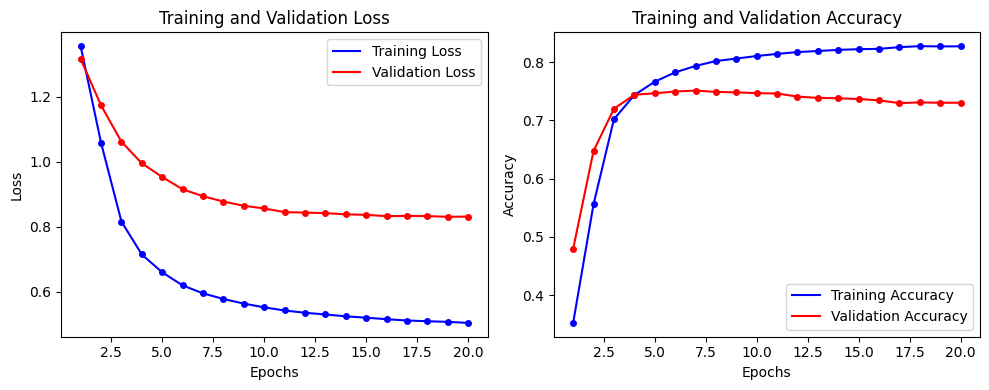

In [ ]:
plot_metrics(training_history_gru)

238/238 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step


<Figure size 1200x1000 with 0 Axes>

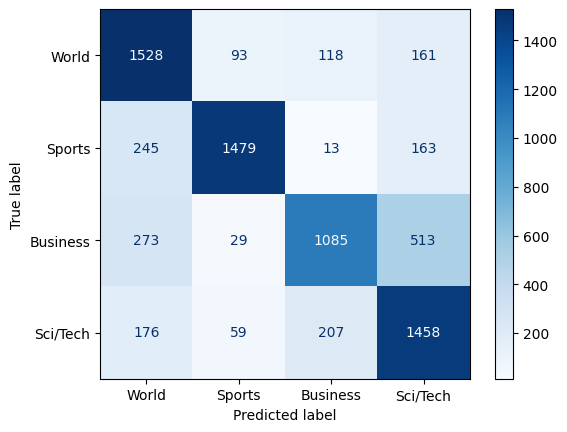

In [ ]:
plot_confusion_matrix(model_gru)

# **Model - LSTM:**

In [36]:
model_lstm = tf.keras.Sequential([
    tf.keras.layers.Embedding(num_words, embedding_dim, input_length=max_length),
    tf.keras.layers.LSTM(32, return_sequences=True, dropout=0.2, recurrent_dropout=0.2),
    tf.keras.layers.LSTM(16, dropout=0.2, recurrent_dropout=0.2),
    tf.keras.layers.Dense(4, activation='softmax')
])

model_lstm.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.00002), metrics=['accuracy'])

In [ ]:
training_history_lstm = model_lstm.fit(training_padded, training_labels, epochs=15, validation_data=(testing_padded, testing_labels))  # Done

Epoch 1/15
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 93s 24ms/step - accuracy: 0.3409 - loss: 1.3677 - val_accuracy: 0.5649 - val_loss: 1.0846
Epoch 2/15
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 91s 24ms/step - accuracy: 0.5582 - loss: 1.0443 - val_accuracy: 0.7061 - val_loss: 0.8170
Epoch 3/15
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 143s 24ms/step - accuracy: 0.6962 - loss: 0.8238 - val_accuracy: 0.7728 - val_loss: 0.6631
Epoch 4/15
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 92s 24ms/step - accuracy: 0.7551 - loss: 0.6911 - val_accuracy: 0.7947 - val_loss: 0.5959
Epoch 5/15
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 139s 24ms/step - accuracy: 0.7831 - loss: 0.6202 - val_accuracy: 0.8030 - val_loss: 0.5567
Epoch 6/15
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 144s 24ms/step - accuracy: 0.7983 - loss: 0.5779 - val_accuracy: 0.8101 - val_loss: 0.5343
Epoch 7/15
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 141s 24ms/step - accuracy: 0.8076 - loss: 0.5499 - val_accuracy: 0.8186 - val_loss: 0.5142
Epoch 8/15
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 91s 24ms/step - accuracy: 0.81

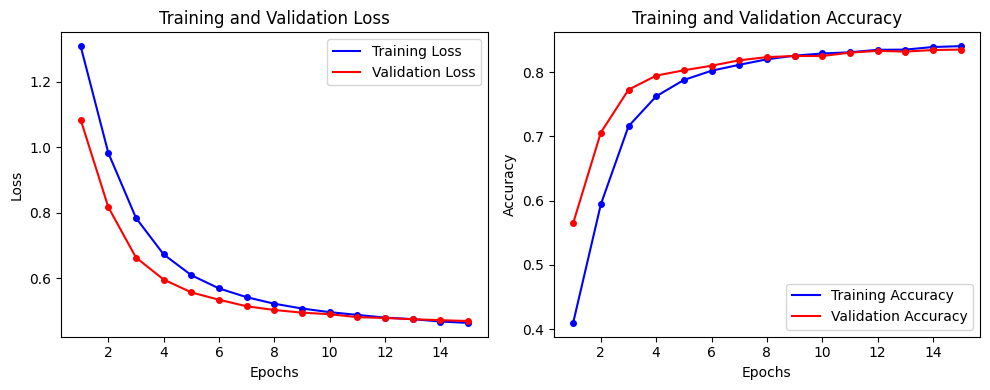

In [ ]:
plot_metrics(training_history_lstm)

238/238 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


<Figure size 1200x1000 with 0 Axes>

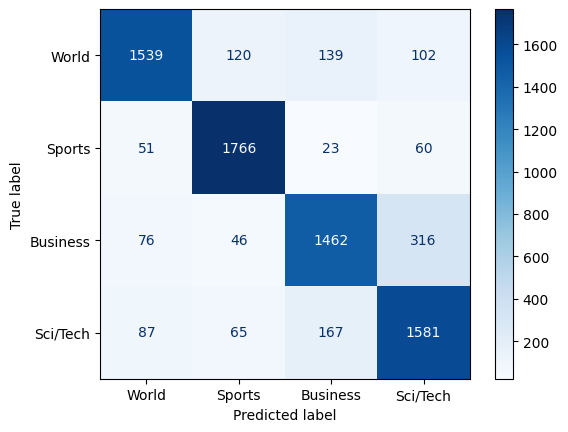

In [ ]:
plot_confusion_matrix(model_lstm)

# **Model - Bidirectional LSTM:**

In [37]:
model_bidirectional_lstm = tf.keras.Sequential([
    tf.keras.layers.Embedding(num_words, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, dropout=0.2, recurrent_dropout=0.2, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16, dropout=0.2, recurrent_dropout=0.2)),
    tf.keras.layers.Dense(4, activation='softmax')
])

model_bidirectional_lstm.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.00002), metrics=['accuracy'])

In [ ]:
training_history_bidirectional_lstm = model_bidirectional_lstm.fit(training_padded, training_labels, epochs=15, validation_data=(testing_padded, testing_labels))

Epoch 1/15
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 169s 43ms/step - accuracy: 0.3374 - loss: 1.3471 - val_accuracy: 0.6080 - val_loss: 0.9267
Epoch 2/15
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 203s 43ms/step - accuracy: 0.5852 - loss: 0.9405 - val_accuracy: 0.6546 - val_loss: 0.7885
Epoch 3/15
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 159s 42ms/step - accuracy: 0.6543 - loss: 0.7993 - val_accuracy: 0.7174 - val_loss: 0.6931
Epoch 4/15
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 202s 42ms/step - accuracy: 0.7110 - loss: 0.6975 - val_accuracy: 0.7804 - val_loss: 0.6048
Epoch 5/15
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 202s 42ms/step - accuracy: 0.7661 - loss: 0.6205 - val_accuracy: 0.8032 - val_loss: 0.5589
Epoch 6/15
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 161s 43ms/step - accuracy: 0.7914 - loss: 0.5770 - val_accuracy: 0.8162 - val_loss: 0.5333
Epoch 7/15
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 159s 42ms/step - accuracy: 0.8087 - loss: 0.5434 - val_accuracy: 0.8207 - val_loss: 0.5150
Epoch 8/15
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 203s 43ms/step - accuracy: 

In [ ]:
plot_metrics(training_history_bidirectional_lstm)

238/238 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step


<Figure size 1200x1000 with 0 Axes>

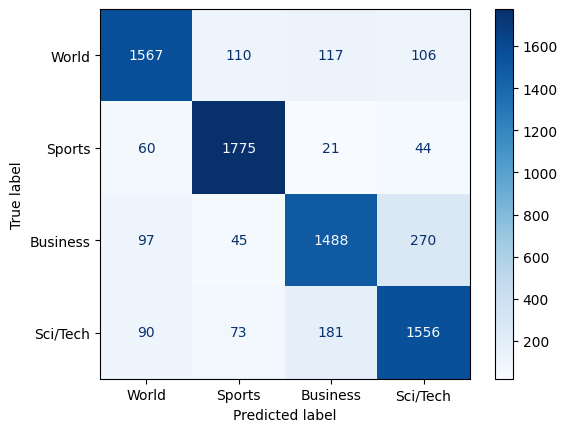

In [ ]:
plot_confusion_matrix(model_bidirectional_lstm)